# Orbital inflation as in ArXiv:1901.03657

In [1]:
import numpy as np
import sympy as sp
from inflatox import (SymbolicCalculation, Compiler, consistency_conditions)
sp.init_printing()

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='JetBrains Mono')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


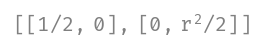

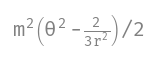

In [3]:
r, θ, m = sp.symbols('r θ m')
fields = [r, θ]

potential = (1/2*m**2*(θ**2-2/(3*r**2))).nsimplify()
metric = [
  [sp.Rational(1,2), 0],
  [0, (0.5*r**2).nsimplify()]
]

display(metric, potential)

In [4]:
hesse = SymbolicCalculation.new_from_list(
  fields,
  metric,
  potential
).execute([[0,1]])

Calculating orthonormal basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculating covariant Hesse matrix...


<IPython.core.display.Math object>

Projecting the Hesse matrix on the vielbein basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
out = Compiler(hesse).compile()
out.print_sym_lookup_table()

[Symbol Dictionary]
r -> x[0]
θ -> x[1]
m -> args[0]


In [12]:
from inflatox.consistency_conditions import AnguelovaLazaroiuCondition
anguelova = AnguelovaLazaroiuCondition(out)
args = np.array([1e-3])

In [17]:
extent = (-10.0, 10.0, -10.0, 10.0)
array = anguelova.evaluate(args, *extent, N_x0=15_000, N_x1=15_000)

[[-10.0, 10.0], [-10.0, 10.0]]


/tmp/ipykernel_34040/1749270527.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


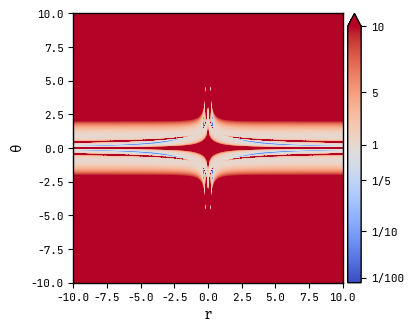

In [18]:
two_norm = mpl.colors.TwoSlopeNorm(0.25, vmax=10)
cmap = mpl.colormaps['coolwarm'].copy()
cmap.set_over(cmap(1.0))
cmap.set_bad(cmap(1.0))

fig = plt.figure(1, figsize=MAIN_FIG(1))
ax = fig.gca()
img = ax.imshow(
  np.flip(array, 0),
  extent=extent,
  cmap=cmap,
  norm=two_norm,
  aspect='equal'
)

#Make colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(
  img,
  extend='max',
  location='right',
  ticks=[1/100, 1/10, 1/5, 1, 5, 10],
  cax=cax
)
cax.set_yticklabels(['1/100','1/10','1/5', '1', '5', '10'])

ax.set_xlabel(f'${sp.latex(fields[0])}$')
ax.set_ylabel(f'${sp.latex(fields[1])}$')
fig.savefig('../out/orbital.svg', transparent=True, bbox_inches="tight", pad_inches=0.05)
fig.show()

In [15]:
extent2 = (0.0, 2.5, 0.0, 2.5)
array2 = anguelova.evaluate(args, *extent2)
extent3 = (0.0, 5.0, 0.0, 2.5)
array3 = anguelova.evaluate(args, *extent2)

[[0.0, 2.5], [0.0, 2.5]]
[[0.0, 2.5], [0.0, 2.5]]


/tmp/ipykernel_34040/3367757326.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


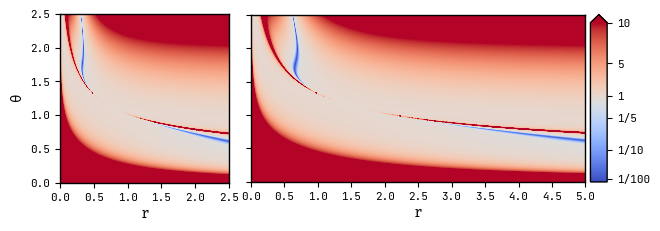

In [16]:
two_norm = mpl.colors.TwoSlopeNorm(0.25, vmax=10)
cmap = mpl.colormaps['coolwarm'].copy()
cmap.set_over(cmap(1.0))
cmap.set_bad(cmap(1.0))

fig, (ax1, ax2) = plt.subplots(
  1,
  2,
  figsize=FULL_FIG(0.5),
  sharey=True,
  width_ratios=[1, 2*1.055]
)

img = ax1.imshow(
  np.flip(array2, 0),
  extent=extent2,
  cmap=cmap,
  norm=two_norm
)

img = ax2.imshow(
  np.flip(array3, 0),
  extent=extent3,
  cmap=cmap,
  norm=two_norm
)

#Make colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(
  img,
  extend='max',
  location='right',
  ticks=[1/100, 1/10, 1/5, 1, 5, 10],
  cax=cax
)
cax.set_yticklabels(['1/100','1/10','1/5', '1', '5', '10'])

ax1.set_xlabel(f'${sp.latex(fields[0])}$')
ax2.set_xlabel(f'${sp.latex(fields[0])}$')
ax2.set_xticks(np.arange(0, 5.5, step=0.5))
ax1.set_ylabel(f'${sp.latex(fields[1])}$')
fig.savefig('../out/orbital_zoomed.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
fig.show()